<a href="https://colab.research.google.com/github/Stephen-Gordon/python_cnn_image_classification/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import TensorFlow
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
# Import Image Generator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [4]:
#https://www.cs.toronto.edu/~kriz/cifar.html
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


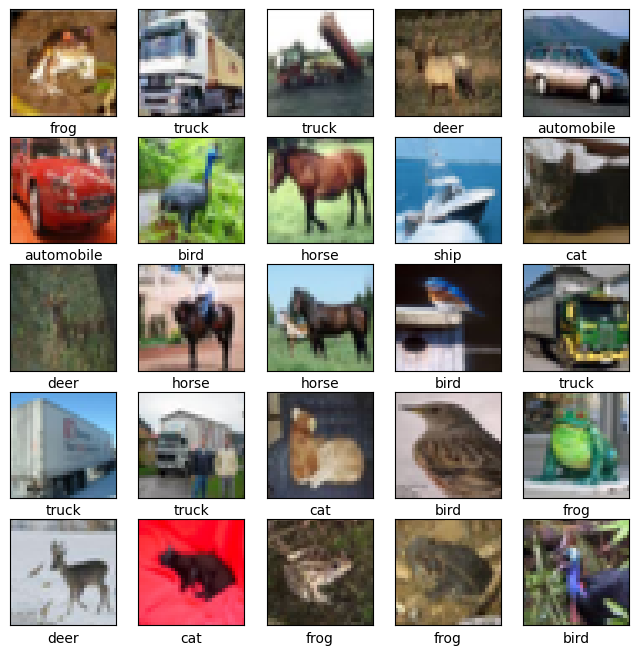

In [5]:


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    #which is why we need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()



# **Augment the images**

In [6]:
datagen = ImageDataGenerator(rotation_range=40)

original_images = np.array(train_images)
original_labels = np.array(train_labels)

augmented_images = []  # To store augmented images

for img in original_images:
    x = img.reshape((1,) + img.shape)  # Convert the image to (1, height, width, channels)

    # Generate a single augmented image
    augmented_img = datagen.random_transform(x[0])
    augmented_images.append(augmented_img)






# Convert the list of original and augmented images to NumPy arrays
#augmented_images = np.array(augmented_images)

# Create a new array that contains both the original and augmented images
#train_images = np.concatenate((original_images, augmented_images), axis=0)

# Create a new array that contains both the original and augmented labels (if applicable)
#train_labels = np.concatenate((original_labels, original_labels), axis=0)

# **Plot augmented images**

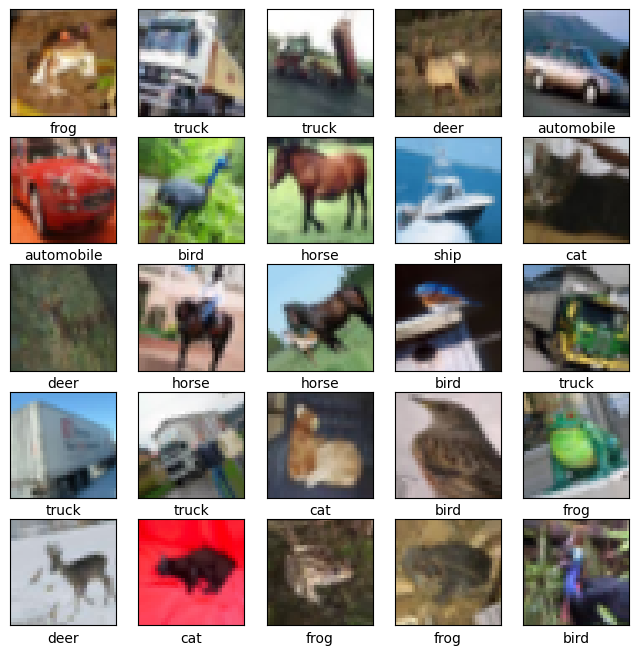

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(augmented_images[i])
    # The CIFAR labels happen to be arrays,
    #which is why we need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()



In [8]:

# Convert the list of original and augmented images to NumPy arrays
augmented_images = np.array(augmented_images)

# Create a new array that contains both the original and augmented images
train_images = np.concatenate((original_images, augmented_images), axis=0)

# Create a new array that contains both the original and augmented labels (if applicable)
train_labels = np.concatenate((original_labels, original_labels), axis=0)

In [18]:


data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)



Create the convolutional base

In [9]:
model = models.Sequential()
#model.add(layers.RandomFlip("horizontal"))
#model.add(layers.RandomRotation(0.1))

#model.add(layers.RandomZoom(0.2))

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
model.summary()

ValueError: ignored

# **Adding Dense Layers on the top**

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

# **Compile and train the model**

In [11]:


# Adam is the best among the adaptive optimizers in most of the cases
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))



Epoch 1/10
3125/3125 [==============================] - 25s 5ms/step - loss: 1.4231 - accuracy: 0.4856 - val_loss: 1.1135 - val_accuracy: 0.5964
Epoch 2/10
3125/3125 [==============================] - 14s 4ms/step - loss: 1.1106 - accuracy: 0.6075 - val_loss: 0.9842 - val_accuracy: 0.6550
Epoch 3/10
3125/3125 [==============================] - 15s 5ms/step - loss: 0.9878 - accuracy: 0.6524 - val_loss: 0.9698 - val_accuracy: 0.6594
Epoch 4/10
3125/3125 [==============================] - 14s 5ms/step - loss: 0.9115 - accuracy: 0.6787 - val_loss: 0.8768 - val_accuracy: 0.6990
Epoch 5/10
3125/3125 [==============================] - 14s 4ms/step - loss: 0.8515 - accuracy: 0.7013 - val_loss: 0.8544 - val_accuracy: 0.7053
Epoch 6/10
3125/3125 [==============================] - 14s 5ms/step - loss: 0.8029 - accuracy: 0.7184 - val_loss: 0.8495 - val_accuracy: 0.7106
Epoch 7/10
3125/3125 [==============================] - 14s 5ms/step - loss: 0.7598 - accuracy: 0.7318 - val_loss: 0.8811 - val_ac

# Evaluate the **model**

313/313 - 1s - loss: 0.8709 - accuracy: 0.7162 - 724ms/epoch - 2ms/step


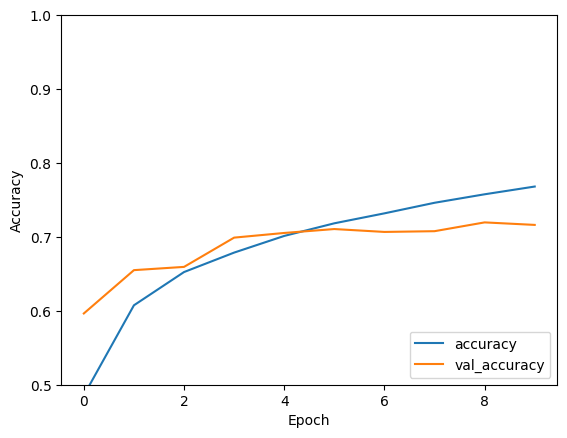

In [12]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [13]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.7161999940872192
